## Decision trees for COVID-19 ML Project
## By:
### Abdel-Rahman Ibrahim El Said Ahmed Megahed  18P7423
### Youssef Mohamed Mostafa Mansi                           18P5848

In [1]:
#required imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from matplotlib import pyplot
from sklearn import tree
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image 
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

In [2]:
#load data into pandas dataframe
df = pd.read_csv('data.csv', index_col = 0)

In [3]:
#Top 10 most repeated locations in the data for one hot encoding
top_10_loc = [x for x in df.location.value_counts().sort_values(ascending = False).head(10).index]
top_10_loc

[108, 45, 44, 114, 110, 106, 99, 116, 85, 117]

In [4]:
#optimizing the dataframe to show data
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)
#One Hot Encoding the locations
for label in top_10_loc:
    df["L" + str(int(label))] = np.where(df['location']==label,1,0)

In [5]:
#Top 10 most repeated countries in the data for one hot encoding
top_10_country = [y for y in df.country.value_counts().sort_values(ascending = False).head(10).index]
top_10_country

[18, 8, 13, 24, 12, 29, 11, 28, 25, 23]

In [6]:
#One Hot Encoding the countries
for label in top_10_country:
    df["C"+str(int(label))] = np.where(df['country']==label,1,0)
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result,L108,L45,L44,L114,L110,L106,L99,L116,L85,L117,C18,C8,C13,C24,C12,C29,C11,C28,C25,C23
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [7]:
#dropping the country & location columns
df = df.drop(['country'],axis=1)
df = df.drop(['location'],axis=1)
df

,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result,L108,L45,L44,L114,L110,L106,L99,L116,L85,L117,C18,C8,C13,C24,C12,C29,C11,C28,C25,C23
0,1,66.0,1,0,14,31,19,12,3,1,8,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,56.0,0,1,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,46.0,0,1,14,31,19,12,3,1,13,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,60.0,1,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,1,58.0,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,2,24.0,0,0,14,31,19,12,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
859,2,35.0,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
860,1,49.4,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
861,1,49.4,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
#dropping then adding the result column to the end of the dataset
res_df = df['result']
res_df
df = df.drop(['result'],axis=1)
df['result']= res_df
df

,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,L108,L45,L44,L114,L110,L106,L99,L116,L85,L117,C18,C8,C13,C24,C12,C29,C11,C28,C25,C23,result
0,1,66.0,1,0,14,31,19,12,3,1,8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,56.0,0,1,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,46.0,0,1,14,31,19,12,3,1,13,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,60.0,1,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,58.0,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,2,24.0,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
859,2,35.0,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
860,1,49.4,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
861,1,49.4,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
#split dataset
X = df.iloc[:, 0:31]
y = df.iloc[:, -1]
X_train , X_test, y_train , y_test = train_test_split(X,y, random_state = 3 , test_size = 0.2,shuffle = True)

In [10]:
#feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


C:\Users\youse\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:59:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: -0.115693 using {'max_depth': 7}
-0.137073 (0.061168) with: {'max_depth': 1}
-0.128615 (0.074830) with: {'max_depth': 3}
-0.121053 (0.073038) with: {'max_depth': 5}
-0.115693 (0.076319) with: {'max_depth': 7}
-0.117554 (0.075909) with: {'max_depth': 9}


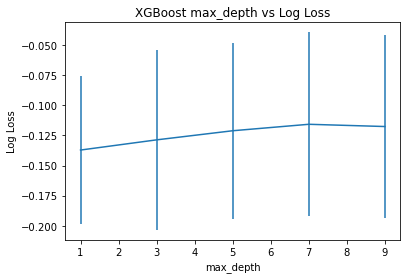

In [11]:
model = XGBClassifier()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train , y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(max_depth, means, yerr=stds)
pyplot.title("XGBoost max_depth vs Log Loss")
pyplot.xlabel('max_depth')
pyplot.ylabel('Log Loss')
pyplot.savefig('max_depth.png')

In [12]:
#model definition
dt = tree.DecisionTreeClassifier(max_depth = 7)

In [13]:
#fit model
dt.fit(X_train, y_train)
print(dt.tree_.max_depth)

7


In [14]:
#Calculating predication values of Y using the model
y_pred = dt.predict(X_test)

In [15]:
confusion_matrix(y_test, y_pred)

array([[150,   5],
       [  5,  13]], dtype=int64)

accuracy score: 0.9421965317919075
f-1 score: 0.7222222222222222
precision_score: 0.7222222222222222
recall_score: 0.7222222222222222
roc_auc_score: 0.8449820788530467


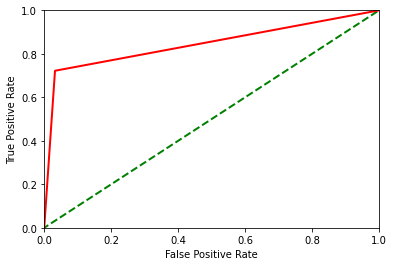

In [16]:
print('accuracy score:',accuracy_score(y_test, y_pred))
print('f-1 score:',f1_score(y_test, y_pred))
print('precision_score:',precision_score(y_test, y_pred))
print('recall_score:',recall_score(y_test, y_pred))
print('roc_auc_score:',roc_auc_score(y_test, y_pred))
fpr, tpr, threshholds = roc_curve(y_test, y_pred)
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2])
plt.plot(threshholds, threshholds, color = "green", lw = lw, linestyle = "dashed")

plt.plot(fpr, tpr, color = "red", lw = lw, linestyle = "solid")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


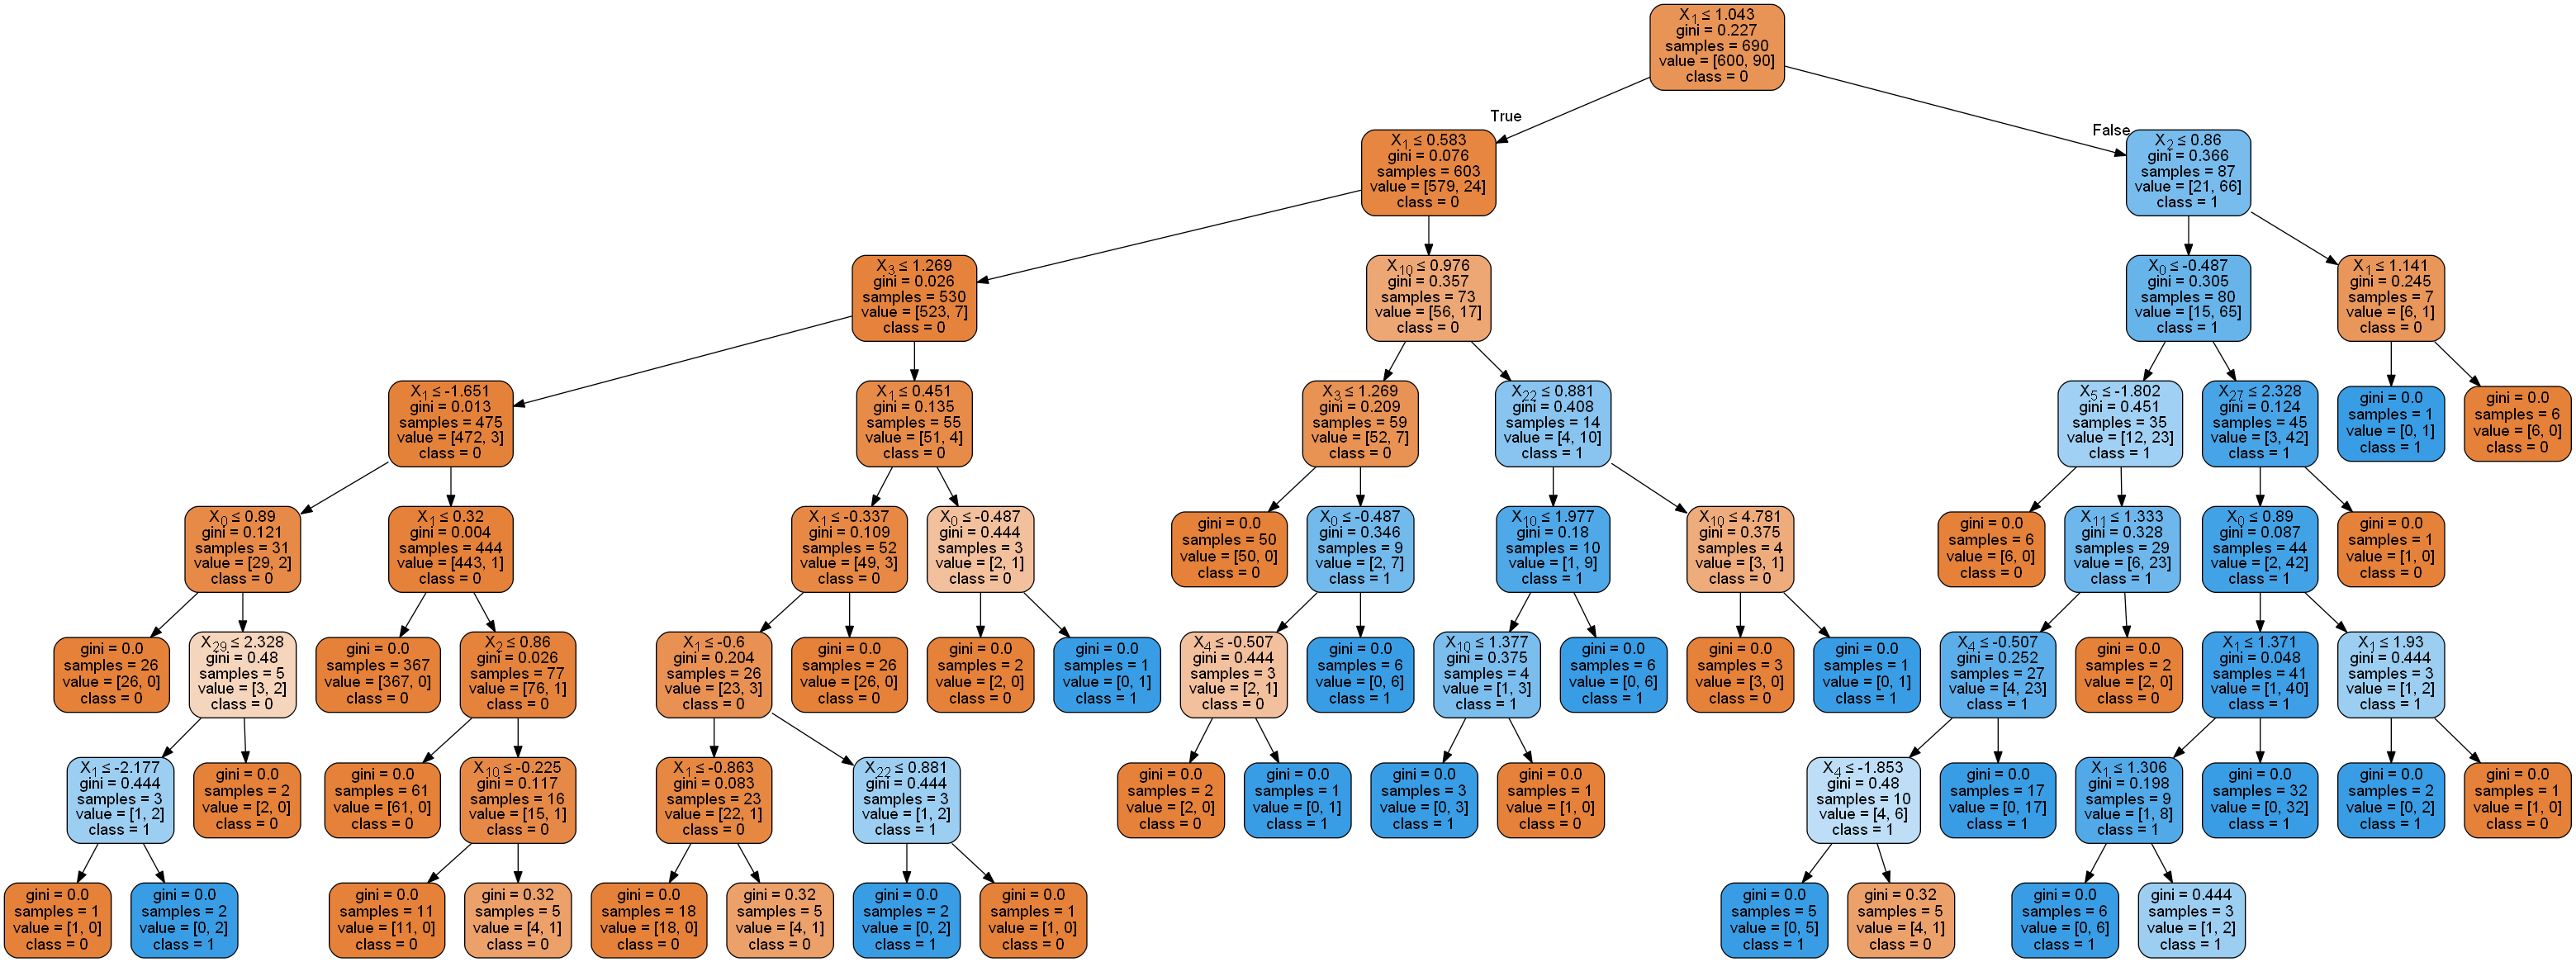

In [17]:
dot_data = StringIO()
export_graphviz(dt , out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('EntropyTree.png')
Image(graph.create_png())